<a href="https://colab.research.google.com/github/dalgual/aidatasci/blob/main/chartConfusionMatrixSummer2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from array import *
import numpy as np
from numpy.linalg import inv

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

In [ ]:
def precisionH2O(label, confusion_matrix):
    return recall(label, confusion_matrix)

In [ ]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

In [ ]:
def recallH2O(label, confusion_matrix):
    return precision(label, confusion_matrix)

In [ ]:
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows



In [ ]:
def precision_macro_averageH2O(confusion_matrix):
    return recall_macro_average(confusion_matrix)

In [ ]:
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
def auc(label, confusion_matrix):
  data_t = confusion_matrix.T
  fpr, tpr, thresholds = metrics.roc_curve(data_t[0], data_t[1], pos_label=label)
  print(fpr, tpr, thresholds)

  ret = metrics.auc(fpr, tpr)

  return ret

In [ ]:
def aucH2O(label, confusion_matrix):
  data_t = confusion_matrix.T
  fpr, tpr, thresholds = metrics.roc_curve(data_t[1], data_t[0], pos_label=label)
  print(fpr, tpr, thresholds)

  ret = metrics.auc(fpr, tpr)

  return ret

In [ ]:
def show_performance(cm2d):
  x = np.array(cm2d)
  cm = np.asmatrix(x)
  #print(cm)

  print("label precision recall")
  for label in range(5):
    print(f"{(label+1):5d} {precision(label, cm):9.5f} {recall(label, cm):6.5f}")

  print("Macro precision recall")
  print(f"{precision_macro_average(cm):9.3f} {recall_macro_average(cm):6.3f}")

  #print("AUC")
  #print(f"{auc(label, x):6.3f}")


In [ ]:
def show_performanceH2O(cm2d):
  x = np.array(cm2d)
  cm = np.asmatrix(x)
  #print(cm)

  print("label precision recall")
  for label in range(5):
    print(f"{(label+1):5d} {recall(label, cm):9.5f} {precision(label, cm):6.5f}")

  print("Macro precision recall")
  print(f"{recall_macro_average(cm):6.3f} {precision_macro_average(cm):9.3f} ")

  #print("AUC")
  #print(f"{aucH2O(label, x):6.3f}")


## Multiple models for Waze traffic

### Random Forrest Pipeline in PySpark
ConfusionMatrix()
Returns confusion matrix: predicted classes are in columns, they are ordered by class label ascending, as in “labels” [5]

In [ ]:
rf_pipe = [[6.615000e+03,  2.791500e+04,  1.091900e+05,  4.100000e+01,  2.200000e+01],
[5.700000e+02,  1.628270e+05,  8.230030e+05,  1.024000e+03,  6.060000e+02],
[1.900000e+01,  4.462100e+04,  1.640278e+06,  5.983000e+03,  1.028000e+03],
[1.000000e+01,  8.450000e+03,  4.629050e+05,  2.057500e+04,  6.780000e+02],
[0.000000e+00,  6.000000e+01,  2.031000e+03,  1.023000e+03,  1.094200e+04]]

In [ ]:
show_performance(rf_pipe)

label precision recall
    1   0.91697 0.04601
    2   0.66767 0.16480
    3   0.54003 0.96947
    4   0.71825 0.04177
    5   0.82419 0.77846
Macro precision recall
    0.733  0.400


In [ ]:
# transpose the matrix
trf_pipe = np.transpose(rf_pipe)
trf_pipe

array([[6.615000e+03, 5.700000e+02, 1.900000e+01, 1.000000e+01,
        0.000000e+00],
       [2.791500e+04, 1.628270e+05, 4.462100e+04, 8.450000e+03,
        6.000000e+01],
       [1.091900e+05, 8.230030e+05, 1.640278e+06, 4.629050e+05,
        2.031000e+03],
       [4.100000e+01, 1.024000e+03, 5.983000e+03, 2.057500e+04,
        1.023000e+03],
       [2.200000e+01, 6.060000e+02, 1.028000e+03, 6.780000e+02,
        1.094200e+04]])

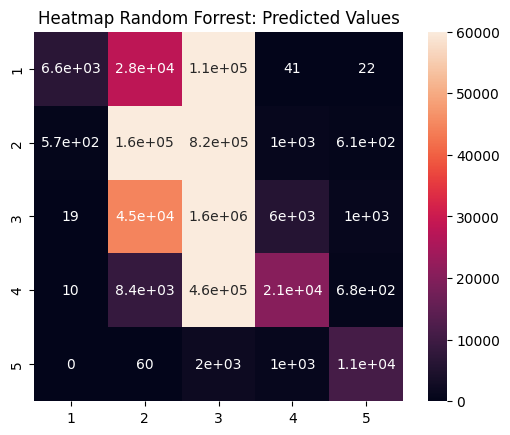

In [ ]:
x_axis_labels = [1,2,3,4,5] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(rf_pipe, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmax=60000, vmin=0, square=True, annot=True) #cmap='Blues',
plt.title("Heatmap Random Forrest: Predicted Values")
plt.show()

# H2O XGBoost [4]
In H2O, the actual results display in the rows and the predictions display in the columns; correct predictions are highlighted in yellow

In [ ]:
xgboost_h2o = [[66763,  122151,       271036,       640,     22]  ,
[21897,  833601,       2.29120e+06,  11266,   609] ,
[6190,   376629,       4.97228e+06,  58548,   1775],
[1484,   73440,        1.35038e+06,  149103,  833],
[31,     342 ,         2892,         471,     41012]]

In [ ]:
# transpose the matrix
txgboost_h2o = np.transpose(xgboost_h2o)
txgboost_h2o

array([[6.67630e+04, 2.18970e+04, 6.19000e+03, 1.48400e+03, 3.10000e+01],
       [1.22151e+05, 8.33601e+05, 3.76629e+05, 7.34400e+04, 3.42000e+02],
       [2.71036e+05, 2.29120e+06, 4.97228e+06, 1.35038e+06, 2.89200e+03],
       [6.40000e+02, 1.12660e+04, 5.85480e+04, 1.49103e+05, 4.71000e+02],
       [2.20000e+01, 6.09000e+02, 1.77500e+03, 8.33000e+02, 4.10120e+04]])

In [ ]:
show_performance(xgboost_h2o)

label precision recall
    1   0.69281 0.14494
    2   0.59282 0.26392
    3   0.55945 0.91817
    4   0.67765 0.09465
    5   0.92680 0.91651
Macro precision recall
    0.690  0.468


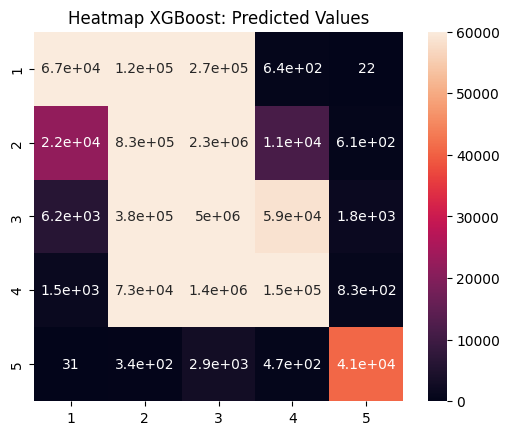

In [ ]:
x_axis_labels = [1,2,3,4,5] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(xgboost_h2o, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmax=60000, vmin=0, square=True, annot=True) #cmap='Blues',
plt.title("Heatmap XGBoost: Predicted Values")
plt.show()

## 2nd Random Forrest

In [ ]:
metrics = [[6.615000e+03, 2.791500e+04, 1.091900e+05, 4.100000e+01, 2.200000e+01],
 [5.700000e+02, 1.628270e+05, 8.230030e+05, 1.024000e+03, 6.060000e+02],
 [1.900000e+01, 4.462100e+04, 1.640278e+06, 5.983000e+03, 1.028000e+03],
 [1.000000e+01, 8.450000e+03, 4.629050e+05, 2.057500e+04, 6.780000e+02],
 [0.000000e+00, 6.000000e+01, 2.031000e+03, 1.023000e+03, 1.094200e+04]]

In [ ]:
show_performance(metrics)

label precision recall
    1   0.91697 0.04601
    2   0.66767 0.16480
    3   0.54003 0.96947
    4   0.71825 0.04177
    5   0.82419 0.77846
Macro precision recall
    0.733  0.400


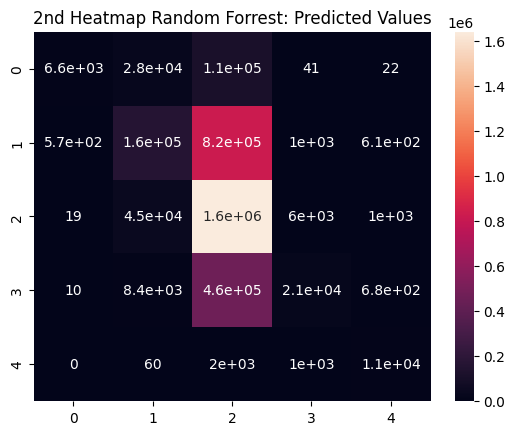

In [ ]:

sns.heatmap(metrics, annot=True)
plt.title("2nd Heatmap Random Forrest: Predicted Values")
plt.show()

## The 3rd Random Forrest

In [ ]:
a1 = [[6.615000e+03, 2.791500e+04, 1.091900e+05, 4.100000e+01, 2.200000e+01],
 [5.700000e+02, 1.628270e+05, 8.230030e+05, 1.024000e+03, 6.060000e+02],
 [1.900000e+01, 4.462100e+04, 1.640278e+06, 5.983000e+03, 1.028000e+03],
 [1.000000e+01, 8.450000e+03, 4.629050e+05, 2.057500e+04, 6.780000e+02],
 [0.000000e+00, 6.000000e+01, 2.031000e+03, 1.023000e+03, 1.094200e+04]]

In [ ]:
print(a1)

[[6615.0, 27915.0, 109190.0, 41.0, 22.0], [570.0, 162827.0, 823003.0, 1024.0, 606.0], [19.0, 44621.0, 1640278.0, 5983.0, 1028.0], [10.0, 8450.0, 462905.0, 20575.0, 678.0], [0.0, 60.0, 2031.0, 1023.0, 10942.0]]


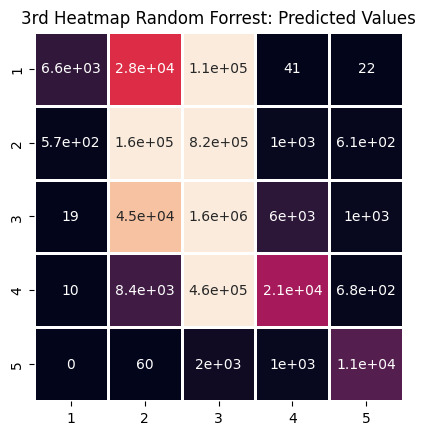

In [ ]:
x_axis_labels = [1,2,3,4,5] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(a1, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar=0, linewidths=2,vmax=50000, vmin=0, square=True, annot=True) #cmap='Blues',
plt.title("3rd Heatmap Random Forrest: Predicted Values")
plt.show()


## H2O Deep Learning: 50 Epochs

In [ ]:
dlEpoch50 = [[0,    0 ,   114938,       0,    0],
    [0,    0,    788461 ,      0,    0],
    [0,    0,    1.35504e+06,  0,    0],
    [0,    0,    393988,       0,    0],
    [0,    0 ,   11246,        0,    0]]

In [ ]:
# transpose the matrix
tdlEpoch50 = np.transpose(dlEpoch50)
tdlEpoch50

array([[      0.,       0.,       0.,       0.,       0.],
       [      0.,       0.,       0.,       0.,       0.],
       [ 114938.,  788461., 1355040.,  393988.,   11246.],
       [      0.,       0.,       0.,       0.,       0.],
       [      0.,       0.,       0.,       0.,       0.]])

In [ ]:
show_performance(dlEpoch50)

label precision recall
    1       nan 0.00000
    2       nan 0.00000
    3   0.50871 1.00000
    4       nan 0.00000
    5       nan 0.00000
Macro precision recall
      nan  0.200


<ipython-input-2-e9842de4fcc4>:3: RuntimeWarning: invalid value encountered in double_scalars
  return confusion_matrix[label, label] / col.sum()


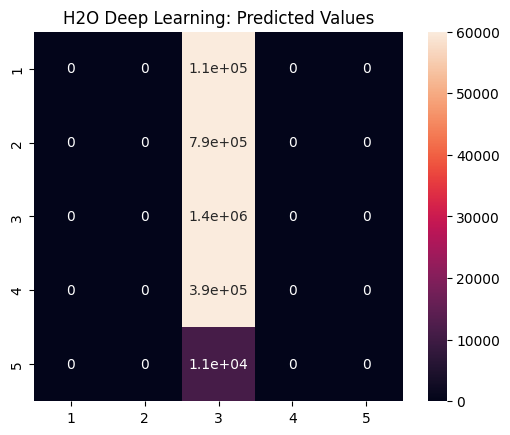

In [ ]:
x_axis_labels = [1,2,3,4,5] # labels for x-axis
y_axis_labels = [1,2,3,4,5] # labels for y-axis

# create seabvorn heatmap with required labels
sns.heatmap(dlEpoch50, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmax=60000, vmin=0, square=True, annot=True) #cmap='Blues',
plt.title("H2O Deep Learning: Predicted Values")
plt.show()

## References
1. Confusion Matrix in Machine Learning, https://python-course.eu/machine-learning/confusion-matrix-in-machine-learning.php
1. Calculating Precision & Recall for Multi-Class Classification, https://medium.com/data-science-in-your-pocket/calculating-precision-recall-for-multi-class-classification-9055931ee229
1. Confusion Matrix: How To Use It & Interpret Results [Examples], https://www.v7labs.com/blog/confusion-matrix-guide#:~:text=the%20negative%20class.-,Confusion%20Matrix%20for%20Multiple%20Classes,output%20distribution%20by%20the%20classifier.&text=Exemplar%20test%20set%20of%20a%20multi%2Dclass%20dataset.
1. H2O Confusion Matrix,  https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
1. Spark Confusion Matrix, https://spark.apache.org/docs/3.0.0/api/python/pyspark.mllib.html